## things to try
    is average conc. coming out the same as (mass total/ volume total)?
    why is the mid depth higher in DIC than the low depth?
    where are those jumps? 
    annotate
    visualise fluxes
    

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc
import numpy as np
import scipy as sp
import datetime as dt
import netCDF4 as nc
import pickle
import cmocean as cm
import glob

%matplotlib inline

In [6]:


BR1 = 'BR_1st_2015'; BR2 = 'BR_2nd_2015'; LA1 = 'PI_1st_2015'; LA2 = 'PI_2nd_2015'; LA3 = 'PI_3rd_2015';
PI1 = 'PI_ACBC_2015'; PI2 = 'PI_ACBC_2015_2'; PI3 = 'PI_ACBC_2015_3'

car_suffix = '_dissolved_inorganic_carbon_sums_perday.pkl'
nit_suffix = '_nitrate_sums_perday.pkl'

#DIC
BR1_DIC = pickle.load(open('./pickles/'+BR1+car_suffix , 'rb')) 
LA1_DIC = pickle.load(open('./pickles/'+LA1+car_suffix , 'rb'))
PI1_DIC = pickle.load(open('./pickles/'+PI1+car_suffix , 'rb'))
BR2_DIC = pickle.load(open('./pickles/'+BR2+car_suffix , 'rb')) 
LA2_DIC = pickle.load(open('./pickles/'+LA2+car_suffix , 'rb'))
PI2_DIC = pickle.load(open('./pickles/'+PI2+car_suffix , 'rb'))
LA3_DIC = pickle.load(open('./pickles/'+LA3+car_suffix , 'rb'))
PI3_DIC = pickle.load(open('./pickles/'+PI3+car_suffix , 'rb'))
#NIT
BR1_NIT = pickle.load(open('./pickles/'+BR1+nit_suffix , 'rb')) 
LA1_NIT = pickle.load(open('./pickles/'+LA1+nit_suffix , 'rb'))
PI1_NIT = pickle.load(open('./pickles/'+PI1+nit_suffix , 'rb'))
BR2_NIT = pickle.load(open('./pickles/'+BR2+nit_suffix , 'rb')) 
LA2_NIT = pickle.load(open('./pickles/'+LA2+nit_suffix , 'rb'))
PI2_NIT = pickle.load(open('./pickles/'+PI2+nit_suffix , 'rb'))
LA3_NIT = pickle.load(open('./pickles/'+LA3+nit_suffix , 'rb'))
PI3_NIT = pickle.load(open('./pickles/'+PI3+nit_suffix , 'rb'))

csize = pickle.load(open('./pickles//cellsize.pkl', 'rb'))

mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
bath = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')

In [33]:
grid = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
#get udir, vdir, wdir
vdir = grid['e2t'][0,:,:]
udir = grid['e1t'][0,:,:]
wdir = grid['e3t_0'][0,:,:,:]
tmask = grid['tmask'][0,:,:,:]

# w = np.array([[2,3],[2,3]])
# x = np.array([[2,4],[2,3]])
# print(w*x)
surfa = vdir*udir
surfa_broad = np.zeros([40,898,398])
for i in range(0,40):
    surfa_broad[i,:,:] = surfa

csize_recalc = surfa_broad*wdir*tmask
csize_recalc[:,878:898,:] = 0
csize_recalc[:,:,0:20] = 0
csize_recalc[csize_recalc==0] = np.nan


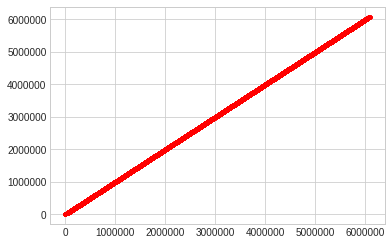

In [16]:
cr_r = np.ravel(csize_recalc)
c_r = np.ravel(csize)

plt.plot(cr_r,c_r,'r.')

In [19]:
sdir = 'MAIN/BR_2nd_2015'
sdir_short = 'BR_2nd_2015'
ftype = 'carp'
ymd = '20150601'
nc_sens = '/data/tjarniko/results/BASERUN_EXP/' \
+ sdir + '/ncs/SKOG_1d_*'+ ftype +'*' + ymd + '-' + ymd + '.nc'
w = (glob.glob(nc_sens))
td = nc.Dataset(w[0])

td_dic =td['dissolved_inorganic_carbon']

prof
(40,)
[1572.2125 1597.9929 1633.2594 1667.5873 1704.8857 1748.7549 1785.9296
 1815.4675 1845.8112 1870.8143 1888.803  1904.2338 1918.1552 1933.5764
 1945.8677 1959.3948 1970.1283 1981.4083 1992.5958 2005.1364 2020.5399
 2039.4346 2061.1047 2085.2876 2111.7273 2133.2734 2147.9226 2159.3057
 2168.024  2172.6963 2156.2307 2147.149  2141.37   2139.3657 2133.9785
 2136.7217 2137.4636 2137.797  2137.3196       nan]


/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':


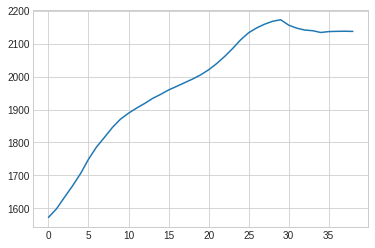

In [40]:
dic_day = td_dic[0,:,:,:]
jst = 500
ist = 230
d = 38
#print(dic_day[d,jst:jst+10,ist:ist+10])

#print(csize_recalc[d,jst:jst+10,ist:ist+10])
print('prof')
dic_day[dic_day == 0 ] = np.nan
#print(dic_day[:,jst:jst+1,ist:ist+1])

domain_avg = np.nanmean(np.nanmean(dic_day,axis=1),axis = 1)
print(np.shape(domain_avg))
print(domain_avg)
plt.plot(domain_avg)


In [77]:
BR2_DIC_alg1 = \
pickle.load(open('./pickles/BR_2nd_2015_dissolved_inorganic_carbon_sums_perday.pkl' , 'rb'))
BR2_DIC_alg2 = \
pickle.load(open('./pickles/BR_2nd_2015_dissolved_inorganic_carbon_sums_perday_alg2.pkl' , 'rb'))

BR2_DIC_alg1r = np.ravel(BR2_DIC_alg1)

# print(np.shape(BR2_DIC_alg1r))
BR2_DIC_alg2r = np.ravel(BR2_DIC_alg2)

diff = BR2_DIC_alg1-BR2_DIC_alg2
print(np.max(diff))
print(np.max(BR2_DIC_alg1) )
# # plt.plot(BR2_DIC_alg1r[0:2000],BR2_DIC_alg2r[0:2000])

# fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(1,1,1)
# ax.plot(BR2_DIC_alg1r[:],BR2_DIC_alg2r[:],'r*')
# ax.set_xlim([4e14,5e14])
# ax.set_ylim([4e14,5e14])
# print(BR2_DIC_alg1r[0:10])
# print(BR2_DIC_alg2r[0:10])

13710373240415.625
463235410439838.56


(40, 898, 398)
(40,)
(40, 365)
[1797.52481917 1802.01268102 1812.73506689 1826.43870755 1851.73723687
 1871.09932566 1889.80005008 1906.8799017  1922.94765635 1938.11739094
 1953.01527458 1965.82259595 1977.51363888 1988.48684484 1998.35295384
 2007.67345667 2015.97982733 2024.07049166 2031.88724273 2040.91471796
 2051.33643691 2064.07174378 2078.65734802 2095.76373697 2113.98719075
 2135.46384132 2154.5607759  2172.25764922 2190.87878512 2209.5689569
 2223.36712895 2230.5319142  2216.58046429 2186.17993207 2179.30325192
 2173.05281191 2167.24061661 2158.10235514 2137.9989485            nan]
[1723.11450195 1727.63916016 1740.80395508 1758.53967285 1774.5958252
 1798.00793457 1821.86669922 1845.29943848 1872.40869141 1896.48962402
 1913.76721191 1928.01171875 1940.29650879 1953.45751953 1963.23303223
 1974.1081543  1981.97607422 1990.20043945 1997.87988281 2006.27697754
 2016.04223633 2028.1159668  2042.86401367 2059.81616211 2080.29003906
 2103.32543945 2123.61547852 2139.14672852 2151

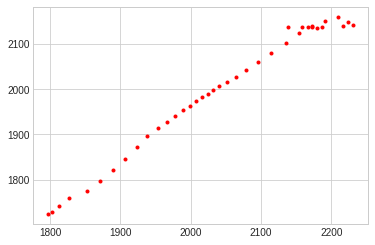

In [98]:
## compare means to sums
BR2_means = pickle.load(open('./pickles/BR_2nd_2015_dissolved_inorganic_carbon_means_perday.pkl','rb'))
BR2_sums = pickle.load(open('./pickles/BR_2nd_2015_dissolved_inorganic_carbon_sums_perday.pkl','rb'))
csize2 = pickle.load(open('./pickles/cellsize_alg2.pkl','rb'))
print(np.shape(csize2))
csize2_domainsum = np.nansum((np.nansum(csize2,axis=1)),axis=1)
print(np.shape(csize2_domainsum))
csum_broad = np.zeros([40,365])
for i in range(0,365):
    csum_broad[:,i] = csize2_domainsum
    
print(np.shape(BR2_sums))
BR2_means_fromsums = BR2_sums/csum_broad

print(BR2_means_fromsums[:,100])
print(BR2_means[:,100])
plt.plot(BR2_means_fromsums[:,100],BR2_means[:,100],'.r')

(40, 898, 398)
(40,)
(40, 365)
[1744.28984215 1748.66941659 1759.14667826 1772.58029918 1796.0150747
 1815.04764979 1833.36742019 1849.96359896 1865.73385379 1880.56146049
 1895.27166536 1907.6700604  1918.88466067 1929.50588068 1938.98747411
 1947.85649196 1955.9267929  1963.75472549 1971.449428   1979.81980829
 1989.53924998 2001.20747841 2014.98076691 2031.94712718 2052.62164592
 2074.03825331 2091.26684886 2105.16020448 2118.60738118 2129.06825581
 2132.15357731 2134.67336863 2135.74780234 2138.9970595  2141.04513367
 2141.5970338  2141.23498971 2140.33623321 2136.10990776           nan]
[1759.04724121 1763.47338867 1774.0690918  1787.64672852 1811.01257324
 1830.10424805 1848.82617188 1865.6439209  1881.4017334  1896.20751953
 1910.9017334  1923.1875     1934.57531738 1945.61242676 1955.15893555
 1964.16955566 1972.40026855 1980.30810547 1988.11279297 1996.51794434
 2006.21801758 2017.67602539 2030.984375   2046.55273438 2064.57714844
 2083.54858398 2099.75561523 2112.75341797 212

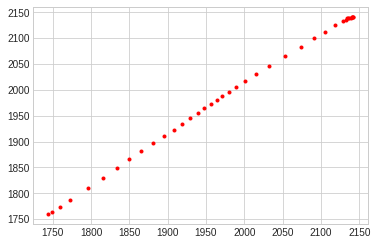

In [102]:
## compare means to sums
BR2_means = pickle.load(open('./pickles/BR_2nd_2015_dissolved_inorganic_carbon_means_perday_alg2.pkl','rb'))
BR2_sums = pickle.load(open('./pickles/BR_2nd_2015_dissolved_inorganic_carbon_sums_perday_alg2.pkl','rb'))
csize2 = pickle.load(open('./pickles/cellsize_alg2.pkl','rb'))
print(np.shape(csize2))
csize2_domainsum = np.nansum((np.nansum(csize2,axis=1)),axis=1)
print(np.shape(csize2_domainsum))
csum_broad = np.zeros([40,365])
for i in range(0,365):
    csum_broad[:,i] = csize2_domainsum
    
print(np.shape(BR2_sums))
BR2_means_fromsums = BR2_sums/csum_broad

print(BR2_means_fromsums[:,100])
print(BR2_means[:,100])
plt.plot(BR2_means_fromsums[:,100],BR2_means[:,100],'.r')

In [101]:
print(np.shape(dic_day))
dic_day[dic_day == 0] = np.nan
for q in range(0,40):
    tdat_alldomain = np.nanmean(dic_day[q,:,:])
    print(tdat_alldomain)

(40, 898, 398)
1577.6609
1610.5231
1657.75
1697.5906
1742.6697
1780.9065
1812.479
1835.6019
1853.8076
1869.3558
1885.1503
1899.4478
1913.4541
1927.3716
1939.4055
1950.6348
1960.921
1970.9973
1981.3309
1992.8601
2006.6604
2023.6497
2043.3899
2065.7654
2089.3455
2108.4426
2121.5686
2130.8823
2138.1702
2141.666
2140.1406
2139.232
2136.745
2136.0527
2136.9102
2138.104
2139.117
2140.1064
2138.1812
nan


/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.


In [67]:
csize_alg2 = \
pickle.load(open('./pickles/cellsize_alg2.pkl' , 'rb'))
print(np.shape(csize_alg2))
print(csize_alg2[:,250,250])
print(dic_day[:,250,250])
dic_day[np.isnan(dic_day)] =0
tot = csize_alg2[:,250,250]*dic_day[:,250,250]
print(tot)

(40, 898, 398)
[222394.0735048354 222394.9319619551 222396.6040073753 222399.86070437636
 222406.2038734285 222418.5586396645 222442.62228648047 222489.49129408682
 222580.77746888244 222758.5703635084 223104.8321696096 223779.13872585937
 225092.0559661927 227647.5539318632 232618.48573435555 242275.95886774448
 260993.43949150215 297102.3475433178 366142.0205610042 495916.60563571716
 732228.4538390547 1138653.0241194807 1773482.841893663 2629872.979318921
 3582301.9059373247 4438692.043362583 5073521.861136765 3190013.0298313075
 nan nan nan nan nan nan nan nan nan nan nan nan]
[1925.1319580078125 1928.3023681640625 1934.334228515625 1938.406005859375
 1942.4461669921875 1945.7696533203125 1949.195068359375 1952.572265625
 1955.75732421875 1958.675537109375 1961.5665283203125 1964.1287841796875
 1966.3568115234375 1968.9615478515625 1971.9603271484375
 1974.7366943359375 1977.586181640625 1980.5184326171875
 1984.6654052734375 1989.76708984375 1997.9871826171875 2014.658447265625
 2

In [ ]:
depth = mesh['e3t_0'][0,:,250,250]

In [ ]:
BR_DIC = np.zeros([40,365*3])
#always spunup
BR_DICsp = np.zeros([40,365*3])
LA_DIC = np.zeros([40,365*3])
PI_DIC = np.zeros([40,365*3])

BR_NIT = np.zeros([40,365*3])
LA_NIT = np.zeros([40,365*3])
PI_NIT = np.zeros([40,365*3])

#load into one array
BR_DIC[:,0:365] = BR1_DIC
LA_DIC[:,0:365] = LA1_DIC
PI_DIC[:,0:365] = PI1_DIC
BR_DIC[:,365:2*365] = BR2_DIC
LA_DIC[:,365:2*365] = LA2_DIC
PI_DIC[:,365:2*365] = PI2_DIC
BR_DIC[:,2*365:3*365] = np.nan
LA_DIC[:,2*365:3*365] = LA3_DIC
PI_DIC[:,2*365:3*365] = PI3_DIC

BR_DICsp[:,0:365] = BR2_DIC
BR_DICsp[:,365:2*365] = BR2_DIC
BR_DICsp[:,2*365:3*365] = BR2_DIC


### Visualize layer totals on one plot

In [ ]:
#print(np.shape(csize))
csize = pickle.load(open('./pickles/cellsize.pkl', 'rb'))
print(np.shape(csize))
ti = 0
js = 380
je = 420
#print(csize[0:20,js:je,ti])
#print(csize[0,450,0])

#plt.pcolormesh(csize[0,:,:])

csize2 = np.copy(csize)
#[0,27:40,0:878,20:398]
csize2[:,:,0:20] = 0
csize2[:,878:898,:] = 0
# print('m')
# print(csize2[0:20,js:je,1])

In [ ]:
cellsize_alldomain = np.sum(np.sum(csize2,axis = 1),axis = 1)
csize_broad = np.zeros((40,365*3))
for i in range(0,365*3):
    csize_broad[:,i] = cellsize_alldomain

In [ ]:
fact = 0.7
depth = mesh['e3t_0'][0,:,250,250]
fig = plt.figure(figsize=(19*fact,14*fact))
days_in = np.arange(0,365*3,1)
lw = 2
tcm = cm.cm.deep
ymin = 1600
ymax = 2280

#BR
ax = fig.add_subplot(3,1,1)
for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    if i%5 !=0: 
        ax.plot(days_in,BR_DIC[i,:]/csize_broad[i,:],color = tcm(1.*i/40), linewidth = lw)
    if i%5 == 0:
            ax.plot(days_in,BR_DIC[i,:]/csize_broad[i,:],color = tcm(1.*i/40),\
                    label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
plt.xlim([0,365*3])
plt.ylim([ymin,ymax])
ax.set_xticklabels([])
ax.set_ylabel('mmol DIC $m^{-3}$', fontsize = 15)
ax.legend(bbox_to_anchor=[1.0, 1.3, 0, 0], fontsize = 12)
plt.title('BR Run: Mean DIC concentration by depth', fontsize = 14 )

#LA
ax = fig.add_subplot(3,1,2)
for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    ax.plot(days_in,LA_DIC[i,:]/csize_broad[i,:],color = tcm(1.*i/40), linewidth = lw)

plt.xlim([0,365*3])
plt.ylim([ymin,ymax])
ax.set_xticklabels([])
ax.set_ylabel('mmol DIC $m^{-3}$', fontsize = 15)
plt.title('LA Run: Mean DIC concentration by depth', fontsize = 14 )

#PI
ax = fig.add_subplot(3,1,3)
for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    ax.plot(days_in,PI_DIC[i,:]/csize_broad[i,:],color = tcm(1.*i/40), linewidth = lw)

plt.xlim([0,365*3])
plt.ylim([ymin,ymax])
ax.set_xticklabels([])
ax.set_ylabel('mmol DIC $m^{-3}$', fontsize = 15)
plt.title('PI Run: Mean DIC concentration by depth', fontsize = 14 )



In [ ]:
fact = 0.7
depth = mesh['e3t_0'][0,:,250,250]
fig = plt.figure(figsize=(19*fact,14*fact))
days_in = np.arange(0,365*3,1)
lw = 2
tcm = cm.cm.deep
ymin = 1600
ymax = 2100

#BR
ax = fig.add_subplot(3,1,1)
for i in range(0,10):
    zdepth = np.sum(depth[0:i])
    if i%1 !=0: 
        ax.plot(days_in,BR_DIC[i,:]/csize_broad[i,:],color = tcm(1.*i/10), linewidth = lw)
    if i%1 == 0:
            ax.plot(days_in,BR_DIC[i,:]/csize_broad[i,:],color = tcm(1.*i/10),\
                    label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
plt.xlim([0,365*3])
plt.ylim([ymin,ymax])
ax.set_xticklabels([])
ax.set_ylabel('mmol DIC $m^{-3}$', fontsize = 15)
ax.legend(bbox_to_anchor=[1.0, 1.3, 0, 0], fontsize = 12)
plt.title('BR Run: Mean DIC concentration by depth - 1st 10 layers', fontsize = 14 )

#LA
ax = fig.add_subplot(3,1,2)
for i in range(0,10):
    zdepth = np.sum(depth[0:i])
    ax.plot(days_in,LA_DIC[i,:]/csize_broad[i,:],color = tcm(1.*i/10), linewidth = lw)

plt.xlim([0,365*3])
plt.ylim([ymin,ymax])
ax.set_xticklabels([])
ax.set_ylabel('mmol DIC $m^{-3}$', fontsize = 15)
ax.legend(bbox_to_anchor=[1.0, 1.3, 0, 0], fontsize = 12)
plt.title('LA Run: Mean DIC concentration by depth', fontsize = 14 )

#PI
ax = fig.add_subplot(3,1,3)
for i in range(0,10):
    zdepth = np.sum(depth[0:i])
    ax.plot(days_in,PI_DIC[i,:]/csize_broad[i,:],color = tcm(1.*i/10), linewidth = lw)

plt.xlim([0,365*3])
plt.ylim([ymin,ymax])
ax.set_xticklabels([])
ax.set_ylabel('mmol DIC $m^{-3}$', fontsize = 15)
ax.legend(bbox_to_anchor=[1.0, 1.3, 0, 0], fontsize = 12)
plt.title('PI Run: Mean DIC concentration by depth', fontsize = 14 )

plt.suptitle('Top 10 layers', fontsize = 30)



In [ ]:
fact = 0.7
depth = mesh['e3t_0'][0,:,250,250]
fig = plt.figure(figsize=(19*fact,14*fact))
days_in = np.arange(0,365*3,1)
lw = 2
tcm = cm.cm.deep
ymin = 2080
ymax = 2280

#BR
ax = fig.add_subplot(3,1,1)
for i in range(30,40):
    zdepth = np.sum(depth[0:i])
    if i%1 !=0: 
        ax.plot(days_in,BR_DIC[i,:]/csize_broad[i,:],color = tcm(1.*(i-30)/10), linewidth = lw)
    if i%1 == 0:
            ax.plot(days_in,BR_DIC[i,:]/csize_broad[i,:],color = tcm(1.*(i-30)/10),\
                    label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
plt.xlim([0,365*3])
plt.ylim([ymin,ymax])
ax.set_xticklabels([])
ax.set_ylabel('mmol DIC $m^{-3}$', fontsize = 15)
ax.legend(bbox_to_anchor=[1.0, 1.3, 0, 0], fontsize = 12)
plt.title('BR Run: Mean DIC concentration by depth', fontsize = 14 )

#LA
ax = fig.add_subplot(3,1,2)
for i in range(30,40):
    zdepth = np.sum(depth[0:i])
    ax.plot(days_in,LA_DIC[i,:]/csize_broad[i,:],color = tcm(1.*(i-30)/10), linewidth = lw)

plt.xlim([0,365*3])
plt.ylim([ymin,ymax])
ax.set_xticklabels([])
ax.set_ylabel('mmol DIC $m^{-3}$', fontsize = 15)
ax.legend(bbox_to_anchor=[1.0, 1.3, 0, 0], fontsize = 12)
plt.title('LA Run: Mean DIC concentration by depth', fontsize = 14 )

#PI
ax = fig.add_subplot(3,1,3)
for i in range(30,40):
    zdepth = np.sum(depth[0:i])
    ax.plot(days_in,PI_DIC[i,:]/csize_broad[i,:],color = tcm(1.*(i-30)/10), linewidth = lw)

plt.xlim([0,365*3])
plt.ylim([ymin,ymax])
ax.set_xticklabels([])
ax.set_ylabel('mmol DIC $m^{-3}$', fontsize = 15)
ax.legend(bbox_to_anchor=[1.0, 1.3, 0, 0], fontsize = 12)
plt.title('PI Run: Mean DIC concentration by depth', fontsize = 14 )

plt.suptitle('Bottom 10 layers', fontsize = 30)



In [ ]:
fact = 0.7
depth = mesh['e3t_0'][0,:,250,250]
fig = plt.figure(figsize=(19*fact,14*fact))
days_in = np.arange(0,365*1,1)
lw = 2
tcm = cm.cm.deep
ymin = -40
ymax = 40

#BR
ax = fig.add_subplot(3,1,1)
for i in range(0,40):
    ti = i
    zdepth = np.sum(depth[0:ti])
    if i%5 !=0: 
        ax.plot(days_in,(BR2_DIC[i,:]-BR1_DIC[i,:])/csize_broad[i,0:365],color = tcm(1.*(i)/40), linewidth = lw)
    if i%5 == 0:
            ax.plot(days_in,(BR2_DIC[i,:]-BR1_DIC[i,:])/csize_broad[i,0:365],color = tcm(1.*(i)/40),\
                    label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
plt.xlim([0,365*1])
plt.ylim([ymin,ymax])
ax.set_xticklabels([])
ax.set_ylabel('mmol DIC $m^{-3}$', fontsize = 15)
ax.legend(bbox_to_anchor=[1.0, 1.05, 0, 0], fontsize = 12)
plt.title('BR2 Run - BR1 Run: Mean DIC concentration by depth - all depths', fontsize = 14 )

ax = fig.add_subplot(3,1,2)
for i in range(0,10):
    ti = i
    zdepth = np.sum(depth[0:ti])
    if i%1 !=0: 
        ax.plot(days_in,(BR2_DIC[i,:]-BR1_DIC[i,:])/csize_broad[i,0:365],color = tcm(1.*(i)/10), linewidth = lw)
    if i%1 == 0:
            ax.plot(days_in,(BR2_DIC[i,:]-BR1_DIC[i,:])/csize_broad[i,0:365],color = tcm(1.*(i)/10),\
                    label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
plt.xlim([0,365*1])
plt.ylim([ymin,ymax])
ax.set_xticklabels([])
ax.set_ylabel('mmol DIC $m^{-3}$', fontsize = 15)
ax.legend(bbox_to_anchor=[1.0, 1.05, 0, 0], fontsize = 12)
plt.title('BR2 Run - BR1 Run: Mean DIC concentration by depth - top 10 depths', fontsize = 14 )

ax = fig.add_subplot(3,1,3)
for i in range(30,40):
    ti = i
    zdepth = np.sum(depth[0:ti])
    if i%1 !=0: 
        ax.plot(days_in,(BR2_DIC[i,:]-BR1_DIC[i,:])/csize_broad[i,0:365],color = tcm(1.*(i-30)/10), linewidth = lw)
    if i%1 == 0:
            ax.plot(days_in,(BR2_DIC[i,:]-BR1_DIC[i,:])/csize_broad[i,0:365],color = tcm(1.*(i-30)/10),\
                    label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
plt.xlim([0,365*1])
plt.ylim([ymin,ymax])
ax.set_xticklabels([])
ax.set_ylabel('mmol DIC $m^{-3}$', fontsize = 15)
ax.legend(bbox_to_anchor=[1.0, 1.05, 0, 0], fontsize = 12)
plt.title('BR2 Run - BR1 Run: Mean DIC concentration by depth - bottom 10 depths', fontsize = 14 )


plt.suptitle('BR2 - BR1', fontsize = 30)



In [ ]:
print(np.shape(csize_broad))

In [ ]:
fact = 0.7
depth = mesh['e3t_0'][0,:,250,250]
fig = plt.figure(figsize=(19*fact,14*fact))
days_in = np.arange(0,365*3,1)
lw = 2
tcm = cm.cm.deep
ymin = -50
ymax = 50

#BR
ax = fig.add_subplot(3,1,1)
for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    if i%5 !=0: 
        ax.plot(days_in,BR_DICsp[i,:]/csize_broad[i,:],color = tcm(1.*i/40), linewidth = lw)
    if i%5 == 0:
            ax.plot(days_in,BR_DICsp[i,:]/csize_broad[i,:],color = tcm(1.*i/40),\
                    label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
plt.xlim([0,365*3])
plt.ylim([1600,2280])
ax.set_xticklabels([])
ax.set_ylabel('mmol DIC $m^{-3}$', fontsize = 15)
ax.legend(bbox_to_anchor=[1.0, 1.3, 0, 0], fontsize = 12)
plt.title('BR Run: Mean DIC concentration by depth (repeating BR2 3 times)', fontsize = 14 )

#LA
ax = fig.add_subplot(3,1,2)
for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    ax.plot(days_in,(BR_DICsp[i,:]-LA_DIC[i,:])/csize_broad[i,:],color = tcm(1.*i/40), linewidth = lw)

plt.xlim([0,365*3])
plt.ylim([ymin,ymax])
ax.set_xticklabels([])
ax.set_ylabel('mmol DIC $m^{-3}$', fontsize = 15)
plt.title('LA Run: Mean DIC concentration by depth', fontsize = 14 )

#PI
ax = fig.add_subplot(3,1,3)
for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    ax.plot(days_in,(BR_DICsp[i,:]-PI_DIC[i,:])/csize_broad[i,:],color = tcm(1.*i/40), linewidth = lw)

plt.xlim([0,365*3])
plt.ylim([ymin,ymax])
ax.set_xticklabels([])
ax.set_ylabel('mmol DIC $m^{-3}$', fontsize = 15)
plt.title('PI Run: Mean DIC concentration by depth', fontsize = 14 )



### notes - 
why is deep strait lower than mid-depth strait? seems suspicious
test with depth profiles
test with averaging

## same analysis for nitrate


In [ ]:
fact = 0.7
depth = mesh['e3t_0'][0,:,250,250]
fig = plt.figure(figsize=(19*fact,14*fact))
days_in = np.arange(0,365*3,1)
lw = 2
tcm = cm.cm.deep
ymin = 0
ymax = 10

#BR
ax = fig.add_subplot(3,1,1)
for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    if i%5 !=0: 
        ax.plot(days_in,BR_NIT[i,:]/csize_broad[i,:],color = tcm(1.*i/40), linewidth = lw)
    if i%5 == 0:
            ax.plot(days_in,BR_NIT[i,:]/csize_broad[i,:],color = tcm(1.*i/40),\
                    label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
plt.xlim([0,365*3])
plt.ylim([ymin,ymax])
ax.set_xticklabels([])
ax.set_ylabel('mmol NIT $m^{-3}$', fontsize = 15)
ax.legend(bbox_to_anchor=[1.0, 1.3, 0, 0], fontsize = 12)
plt.title('BR Run: Mean NIT concentration by depth', fontsize = 14 )

#LA
ax = fig.add_subplot(3,1,2)
for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    ax.plot(days_in,LA_NIT[i,:]/csize_broad[i,:],color = tcm(1.*i/40), linewidth = lw)

plt.xlim([0,365*3])
plt.ylim([ymin,ymax])
ax.set_xticklabels([])
ax.set_ylabel('mmol NIT $m^{-3}$', fontsize = 15)
plt.title('LA Run: Mean NIT concentration by depth', fontsize = 14 )

#PI
ax = fig.add_subplot(3,1,3)
for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    ax.plot(days_in,PI_NIT[i,:]/csize_broad[i,:],color = tcm(1.*i/40), linewidth = lw)

plt.xlim([0,365*3])
plt.ylim([ymin,ymax])
ax.set_xticklabels([])
ax.set_ylabel('mmol NIT $m^{-3}$', fontsize = 15)
plt.title('PI Run: Mean NIT concentration by depth', fontsize = 14 )



In [ ]:
np.max(LA_NIT)